# Setting up the notebook

In [2]:
# import pandas and numpy
import numpy as np
import pandas as pd

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

import matplotlib.pyplot as plt
# inline graphics
%matplotlib inline

# Splitting a pandas object

## Data for the examples

In [6]:
# load the sensors data
sensors = pd.read_csv("data/sensors.csv")
sensors

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
3          1        accel    Z      0.1
4          1        accel    Y      0.4
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[24 rows x 4 columns]

## Grouping by a column values

In [9]:
# group this data by the sensor column / variable
# returns a DataFrameGroupBy object
grouped = sensors.groupby('sensor')
grouped

In [11]:
# get the number of groups that this will create
grouped.ngroups

2

In [13]:
# what are the groups that were found?
grouped.groups

{'accel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'orientation': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

## Accessing the results of a grouping

In [16]:
# a helper function to print the contents of the groups
def print_groups (groupobject):
    # loop over all groups, printing the group name 
    # and group details
    for name, group in groupobject:
        print (name)
        print (group)

In [18]:
# examine the content of the groups we created
print_groups(grouped)

accel
    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
..       ...    ...  ...      ...
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7

[12 rows x 4 columns]
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[12 rows x 4 columns]


In [20]:
# get how many items are in each group
grouped.size()

sensor
accel          12
orientation    12
dtype: int64

In [22]:
# get the count of items in each column of each group
grouped.count()

             interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [24]:
# get the data in one specific group
grouped.get_group('accel')

    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
..       ...    ...  ...      ...
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7

[12 rows x 4 columns]

In [26]:
# get the first three items in each group
grouped.head(3)

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0

In [28]:
# get the first item in each group
grouped.nth(0)

             interval axis  reading
sensor                             
accel               0    Z      0.0
orientation         0    Z      0.0

In [30]:
# get the 2nd item in each group
grouped.nth(1)

             interval axis  reading
sensor                             
accel               0    Y      0.5
orientation         0    Y      0.1

In [32]:
# and so on...
grouped.nth(2)

             interval axis  reading
sensor                             
accel               0    X      1.0
orientation         0    X      0.0

In [34]:
# group by both sensor and axis values
mcg = sensors.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [36]:
# get descriptive statistics for each
mcg.describe()

                 interval                            ... reading               \
                    count mean       std  min   25%  ...     min    25%   50%   
sensor      axis                                     ...                        
accel       X         4.0  1.5  1.290994  0.0  0.75  ...     0.7  0.775  0.85   
            Y         4.0  1.5  1.290994  0.0  0.75  ...     0.2  0.275  0.35   
            Z         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.075  0.15   
orientation X         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.075  0.15   
            Y         4.0  1.5  1.290994  0.0  0.75  ...     0.1  0.175  0.25   
            Z         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.000  0.00   

                              
                    75%  max  
sensor      axis              
accel       X     0.925  1.0  
            Y     0.425  0.5  
            Z     0.225  0.3  
orientation X     0.225  0.3  
            Y     0.325  0.4  
            Z     0.00

## Grouping using index levels

In [39]:
# make a copy of the data and reindex the copy
mi = sensors.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [41]:
# group by the first level of the index 
mig_l1 = mi.groupby(level=0)
print_groups(mig_l1)

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
...               ...      ...
       Y            2      0.3
       X            2      0.8
       Z            3      0.3
       Y            3      0.2
       X            3      0.7

[12 rows x 2 columns]
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
...                    ...      ...
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[12 rows x 2 columns]


In [43]:
# group by multiple levels of the index
mig_l12 = mi.groupby(level=['sensor', 'axis'])
print_groups(mig_l12)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

# Apply (aggregation)

## Applying aggregation functions to groups

In [47]:
# calculate the mean for each sensor/axis
mig_l12.agg(np.mean)

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [49]:
# do not create an index matching the original object
sensors.groupby(['sensor', 'axis'], 
                as_index=False).agg(np.mean)

        sensor axis  interval  reading
0        accel    X       1.5     0.85
1        accel    Y       1.5     0.35
2        accel    Z       1.5     0.15
3  orientation    X       1.5     0.15
4  orientation    Y       1.5     0.25
5  orientation    Z       1.5     0.00

In [51]:
# can simply apply the agg function to the group by object
mig_l12.mean()

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [53]:
# apply multiple aggregation functions at once
mig_l12.agg([np.sum, np.std])

                 interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [55]:
# apply a different function to each column
mig_l12.agg({'interval' : len,
             'reading': np.mean})

                  interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [57]:
# calculate the mean of the reading column
mig_l12['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

## Transformation of group data

### Overview of transformations

In [61]:
# a DataFrame to use for examples
df = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
                    'Values': [0, 1, 2, 3, 4],
                    'Values2': [5, 6, 7, 8, 9],
                    'Noise': ['foo', 'bar', 'baz', 
                              'foobar', 'barbaz']})
df

  Label  Values  Values2   Noise
0     A       0        5     foo
1     C       1        6     bar
2     B       2        7     baz
3     A       3        8  foobar
4     C       4        9  barbaz

In [63]:
# group by label
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values  Values2   Noise
0     A       0        5     foo
3     A       3        8  foobar
B
  Label  Values  Values2 Noise
2     B       2        7   baz
C
  Label  Values  Values2   Noise
1     C       1        6     bar
4     C       4        9  barbaz


In [71]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Apply the transformation to add 10 to all numeric values
transformed = grouped[numeric_columns].transform(lambda x: x + 10)

# Combine the transformed numeric columns with the original non-numeric columns
result = df.drop(columns=numeric_columns).join(transformed)

print(result)

  Label   Noise  Values  Values2
0     A     foo      10       15
1     C     bar      11       16
2     B     baz      12       17
3     A  foobar      13       18
4     C  barbaz      14       19


In [75]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Apply the transformation to add 10 to all numeric values
transformed = grouped[numeric_columns].transform(xplus10)

# Combine the transformed numeric columns with the original non-numeric columns
result = df.drop(columns=numeric_columns).join(transformed)

print(result)

0    0
3    3
Name: Values, dtype: int64
0    5
3    8
Name: Values2, dtype: int64
   Values  Values2
0       0        5
3       3        8
2    2
Name: Values, dtype: int64
2    7
Name: Values2, dtype: int64
   Values  Values2
2       2        7
1    1
4    4
Name: Values, dtype: int64
1    6
4    9
Name: Values2, dtype: int64
   Values  Values2
1       1        6
4       4        9
  Label   Noise  Values  Values2
0     A     foo      10       15
1     C     bar      11       16
2     B     baz      12       17
3     A  foobar      13       18
4     C  barbaz      14       19


In [83]:

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Apply the transformation to add 10 to all numeric values
transformed = grouped[numeric_columns].transform(xplus10)

# Combine the transformed numeric columns with the original non-numeric columns
result = df.drop(columns=numeric_columns).join(transformed)

print(result)

  Label   Noise  Values  Values2
0     A     foo      10       15
1     C     bar      11       16
2     B     baz      12       17
3     A  foobar      13       18
4     C  barbaz      14       19


In [85]:
# sum returns existing as it is applied to each individual item
grouped.transform(lambda x: x.sum())

  Values Values2      Noise
0      3      13  foofoobar
1      5      15  barbarbaz
2      2       7        baz
3      3      13  foofoobar
4      5      15  barbarbaz

### Practical examples of transformation

In [88]:
# data to demonstrate replacement on NaN
df = pd.DataFrame({ 'Label': list("ABABAB"),
                    'Values': [10, 20, 11, np.nan, 12, 22]},
                  index=['i1', 'i2', 'i3', 'i4', 'i5', 'i6'])
df

   Label  Values
i1     A    10.0
i2     B    20.0
i3     A    11.0
i4     B     NaN
i5     A    12.0
i6     B    22.0

In [90]:
# show the groups in the data based upon Label
grouped = df.groupby('Label')
print_groups(grouped)

A
   Label  Values
i1     A    10.0
i3     A    11.0
i5     A    12.0
B
   Label  Values
i2     B    20.0
i4     B     NaN
i6     B    22.0


In [92]:
# calculate the mean of the two groups
grouped.mean()

       Values
Label        
A        11.0
B        21.0

In [94]:
# use transform to fill the NaNs with the mean of the group
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

    Values
i1    10.0
i2    20.0
i3    11.0
i4    21.0
i5    12.0
i6    22.0

In [96]:
# overwrite old values with the new ones
df.Values = filled_NaNs
df

   Label  Values
i1     A    10.0
i2     B    20.0
i3     A    11.0
i4     B    21.0
i5     A    12.0
i6     B    22.0

In [98]:
# generate a rolling mean time series
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), pd.date_range('2011-01-01', periods=365*3))

rolling = data.rolling(240).mean().dropna()



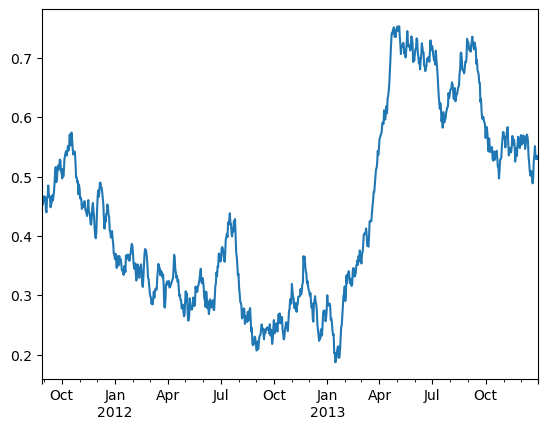

In [100]:
# visualize the series
rolling.plot();

In [102]:
# calculate mean and std by year
groupkey = lambda x: x.year
groups = rolling.groupby(groupkey)
groups.agg([np.mean, np.std])

          mean       std
2011  0.471889  0.045929
2012  0.305093  0.049913
2013  0.561670  0.149529

In [104]:
# normalize to the z-score
zscore = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(groupkey).transform(zscore)
normed.groupby(groupkey).agg([np.mean, np.std])

              mean  std
2011 -8.599823e-16  1.0
2012 -3.499629e-15  1.0
2013  1.405088e-15  1.0

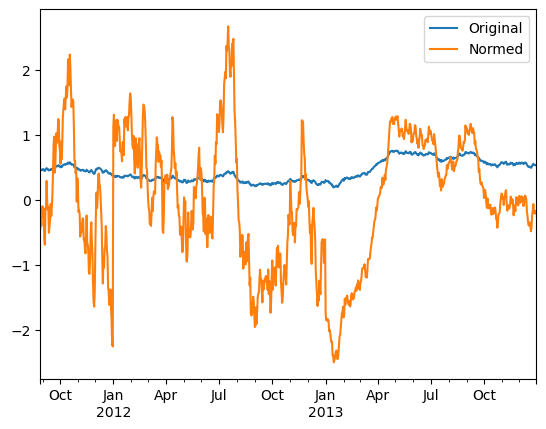

In [106]:
# plot original vs normalize
compared = pd.DataFrame({ 'Original': rolling,
                          'Normed': normed })
compared.plot();

In [108]:
# check the distribution % within one std
# should be roughly 64.2%
normed_in1std = normed[np.abs(normed) <= 1.0].count()
float(normed_in1std) / len(normed)

0.6401869158878505

## Filtering groups

In [111]:
# data for our examples
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     C     4.0
4     C     NaN
5     C     8.0

In [113]:
# drop groups with one or fewer non-NaN values
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
3     C     4.0
4     C     NaN
5     C     8.0

In [115]:
# drop any groups with NaN values
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0

In [117]:
# select groups with a mean of 2.0 or greater 
grouped = df.groupby('Label')
mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - mean) > 2.0
df.groupby('Label').filter(f)

  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0

In [119]:
# replace values in a group where the # of items is <= 1
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f, dropna=False)

  Label  Values
0     A     1.0
1     A     2.0
2   NaN     NaN
3     C     4.0
4     C     NaN
5     C     8.0

# Discretization

In [122]:
# generate 10000 normal random #'s
np.random.seed(123456)
dist = np.random.normal(size = 10000)

# show the mean and std
"{0} {1}".format(dist.mean(), dist.std())

'-0.002863324040906653 1.008716203199891'

In [124]:
# and the actual data
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [126]:
# split the data into 5 bins
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64, right]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [128]:
# show the categories in the bins
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]], dtype='interval[float64, right]')

In [130]:
# demonstrate the math to calculate the bins
min = dist.min()
max = dist.max()
delta = max - min
iwidth = delta/5
extra = delta*0.001
intervals = np.arange(min, max + extra, iwidth)
intervals[0] -= delta*0.001
intervals

array([-3.52809473, -2.07714421, -0.63341235,  0.81031951,  2.25405137,
        3.69778323])

In [132]:
# codes tells us which bin each item is in
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

In [134]:
# move the closed side of the interval to the left
pd.cut(dist, 5, right=False).categories

IntervalIndex([[-3.521, -2.077), [-2.077, -0.633), [-0.633, 0.81), [0.81, 2.254), [2.254, 3.705)], dtype='interval[float64, left]')

In [136]:
# generate 50 ages between 6 and 45
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [138]:
# cut into ranges and then get descriptive stats
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, ranges)
agebins.describe()

            counts  freqs
categories               
(6, 12]          8   0.16
(12, 18]         9   0.18
(18, 35]        21   0.42
(35, 50]        12   0.24

In [140]:
# add names for the bins
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

             counts  freqs
categories                
Youth             8   0.16
Young Adult       9   0.18
Adult            21   0.42
Middle Aged      12   0.24

In [142]:
# cut into quantiles
# 5 bins with an equal quantity of items
qbin = pd.qcut(dist, 5)
# this will tell us the range of values in each quantile
qbin.describe()

                  counts  freqs
categories                     
(-3.522, -0.861]    2000    0.2
(-0.861, -0.241]    2000    0.2
(-0.241, 0.261]     2000    0.2
(0.261, 0.866]      2000    0.2
(0.866, 3.698]      2000    0.2

In [144]:
# make the quantiles at the +/- 3, 2 and 1 std deviations
quantiles = [0,0.001,
             0.021,
             0.5-0.341,
             0.5,
             0.5+0.341,
             1.0-0.021,
             1.0-0.001,
             1.0]
qbin = pd.qcut(dist, quantiles)
# this data should be a perfect normal distribution
qbin.describe()

                    counts  freqs
categories                       
(-3.522, -3.131]        10  0.001
(-3.131, -2.056]       200  0.020
(-2.056, -1.033]      1380  0.138
(-1.033, -0.00363]    3410  0.341
(-0.00363, 1.011]     3410  0.341
(1.011, 2.043]        1380  0.138
(2.043, 3.062]         200  0.020
(3.062, 3.698]          10  0.001